![logo](https://github.com/donatellacea/DL_tutorials/blob/main/notebooks/figures/1128-191-max.png?raw=true)

# Dataset: Wine Recognition

In this Notebook we will show you how to analyse and properly preprocess the Wine Recognition dataset. 

--------

## Getting Started

### Setup Colab environment

If you installed the packages and requirments on your own machine, you can skip this section and start from the import section.
Otherwise you can follow and execute the tutorial on your browser. In order to start working on the notebook, click on the following button, this will open this page in the Colab environment and you will be able to execute the code on your own.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/HelmholtzAI-Consultants-Munich/XAI-Tutorials/blob/main/data_and_models/Dataset-Wine.ipynb)



Now that you are visualizing the notebook in Colab, run the next cell to install the packages we will use.
There are few things you should follow in order to properly set the notebook up:

1. Warning: This notebook was not authored by Google. *Click* on 'Run anyway'.
2. When the installation commands are done, there might be "Restart runtime" button at the end of the output. Please, *click* it. 

In [1]:
# no additional installations needed

By running the next cell you are going to create a folder in your Google Drive. All the files for this tutorial will be uploaded to this folder. After the first execution you might receive some warning and notification, please follow these instructions:
1. Permit this notebook to access your Google Drive files? *Click* on 'Yes', and select your account.
2. Google Drive for desktop wants to access your Google Account. *Click* on 'Allow'.

At this point, a folder has been created and you can navigate it through the lefthand panel in Colab, you might also have received an email that informs you about the access on your Google Drive. 

In [2]:
# Create a folder in your Google Drive
# from google.colab import drive                                                                          
# drive.mount('/content/drive')

In [3]:
# %cd drive/MyDrive

In [4]:
# Don't run this cell if you already cloned the repo 
# !git clone https://github.com/HelmholtzAI-Consultants-Munich/XAI-Tutorials.git

In [5]:
# %cd XAI-Tutorials

### Imports

Let's start with importing all required Python packages.

In [6]:
# Load the required packages
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine

We fix the random seeds to ensure reproducible results, as we work with (pseudo) random numbers.

In [7]:
# assert reproducible random number generation
seed = 1
np.random.seed(seed)

--------

## The Wine Recognition Dataset

In this notebook, we will work with the **Wine Recognition dataset**, containing 178 wine samples from three different cultivators of wine in the same region in Italy. The wine was chemically analysed and 13 different chemical attributes like *alcohol*, *malic acid*, *flavanoids* etc were measured (for more details please see descrption [here](https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-recognition-dataset))

<center><img src="https://github.com/HelmholtzAI-Consultants-Munich/XAI-Tutorials/blob/main/docs/source/_figures/dataset_red_wine.jpg?raw=true" width="900" /></center>

<font size=1> Source:
[Link](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009)

In [8]:
# Load the data
data_wine = load_wine(as_frame=True)

Now, let's have a look at the description of the dataset:

In [9]:
print(data_wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

### Exploratory Data Analysis

Exploratory data analysis is a first important step to get an understanding of the data and to identify patterns and problems in the data. First, we will check how many samples and variables our dataset has and inspect the first few lines of our dataset:

In [10]:
# Get the dataframe
data_wine = data_wine.frame

# Inspect the data
print(f"The dataset has {data_wine.shape[1]} variables that describe {data_wine.shape[0]} wines.")
print(f"We have {data_wine.select_dtypes(include='object').shape[1]} categorical and {data_wine.select_dtypes(exclude='object').shape[1]} numerical variables.")

print("\nHere are the first few lines of our dataset:")
data_wine.head()

The dataset has 14 variables that describe 178 wines.
We have 0 categorical and 14 numerical variables.

Here are the first few lines of our dataset:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


Next, we check if any values are missing:

In [11]:
print(data_wine.isnull().sum())

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64


And last, we inspect how our variables are distributed:

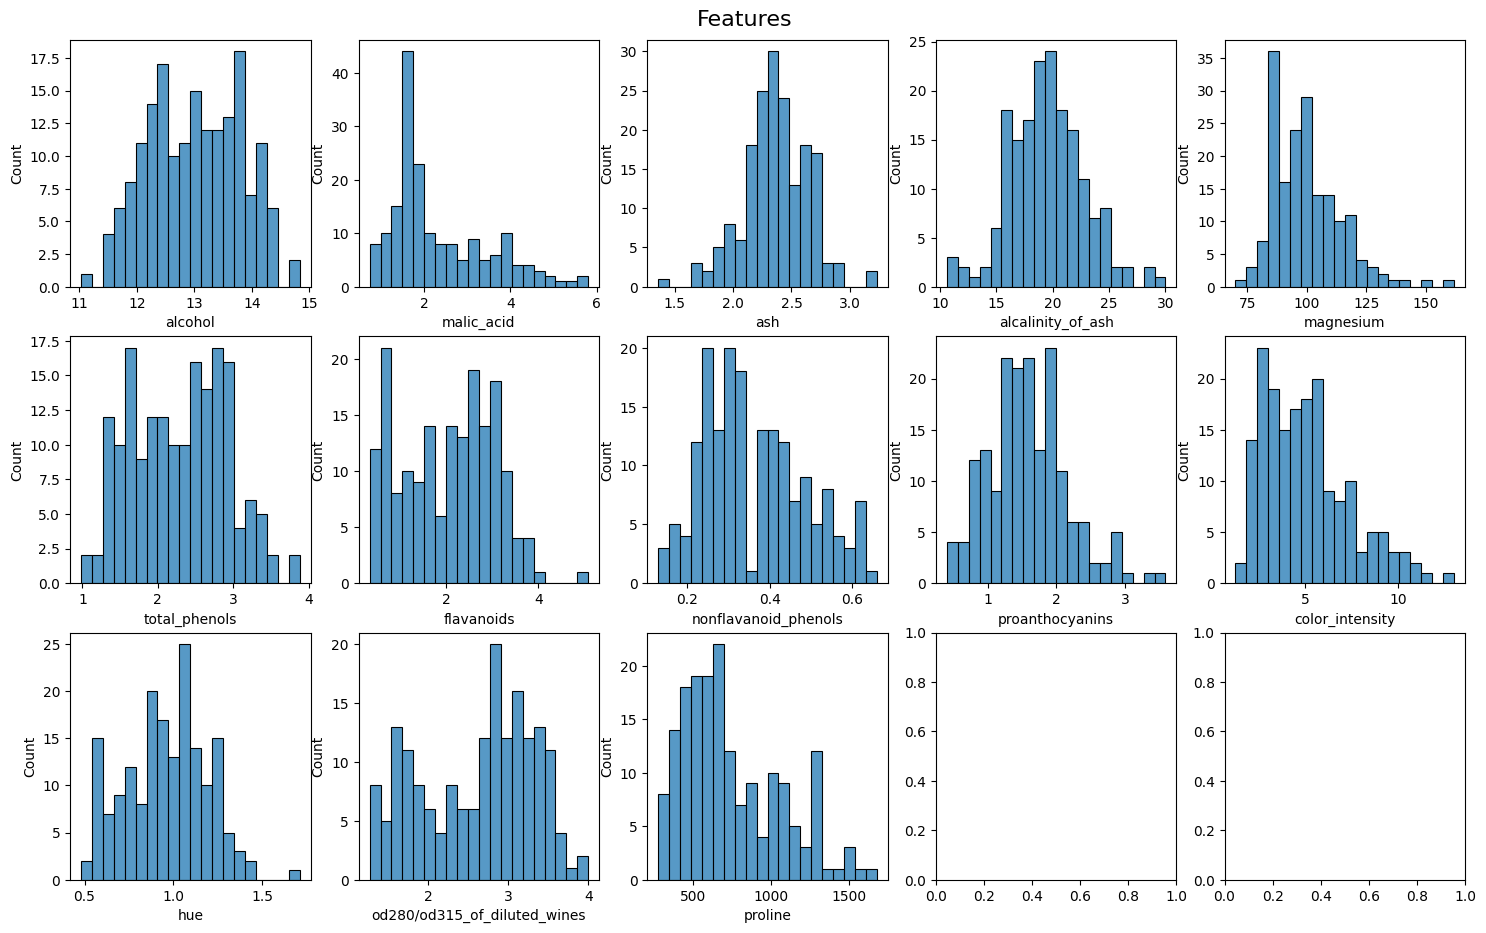

In [12]:
fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(18, 10))
fig.suptitle('Features', fontsize=16)
fig_col = 0
fig_row = 0

for col in data_wine.columns:
    if col != "target":
        sns.histplot(data=data_wine, x=col, bins=20, ax=axs[fig_row, fig_col])
    
    fig_col += 1
    if fig_col == 5:
        fig_col = 0
        fig_row += 1

plt.subplots_adjust(top=0.95) 

By examining the cells above, try to answer the following questions:

<font color='green'>

#### Question 1: Do we need to preprocess some features before modelling?

<font color='grey'>

#### Your Answer: 

No, there are no missing values and we have no categorical features that we need to encode.

Let's now save the dataset in a ``joblib`` file, such that we can load the preprocessed data into other notebooks later on.

In [13]:
# Save the data with joblib
data = data_wine
joblib.dump(data, open('./data_wine_preprocessed.joblib', 'wb'))